# Supervised ML Model - airBNBDataset

In [1]:
# import dependencies
# sklearn is the Scikit-learn machine learning library for Python
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb

import sqlite3
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

## Explore the data

In [2]:
con = sqlite3.connect("finalprojectdatabase.db")
airbnb = pd.read_sql_query("SELECT * from arbnb", con)
airbnb.head()

,listing_url,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,...,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/12899,within an hour,100.0,100.0,1,0,Concordia,45.56488,-122.63418,Entire home/apt,...,1,2021-11-30,4.93,4.94,4.98,4.99,4.99,4.93,4.94,4.08
1,https://www.airbnb.com/rooms/37676,within a day,100.0,55.0,1,1,Pearl,45.52564,-122.68273,Entire home/apt,...,1,2021-12-01,4.88,4.86,4.86,4.83,4.77,4.94,4.66,0.91
2,https://www.airbnb.com/rooms/41601,within an hour,100.0,100.0,1,1,Roseway,45.54804,-122.58541,Entire home/apt,...,0,2021-10-13,4.84,4.90,4.90,4.95,4.92,4.67,4.83,1.76
3,https://www.airbnb.com/rooms/61893,within an hour,100.0,73.0,1,1,Goose Hollow,45.52258,-122.69955,Entire home/apt,...,1,2021-12-01,5.00,5.00,5.00,4.93,5.00,5.00,4.93,0.24
4,https://www.airbnb.com/rooms/67036,within a day,100.0,0.0,0,1,Sullivan's Gulch,45.53103,-122.64448,Entire home/apt,...,0,2020-02-27,4.93,5.00,5.00,5.00,5.00,4.79,4.89,0.23


In [4]:
airbnb.shape

(2101, 27)

In [5]:
cols = airbnb.columns.to_list()
print(cols)

['listing_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [6]:
airbnb.dtypes

listing_url                     object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_identity_verified           int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews_l30d           int64
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [7]:
# drop columns not needed for machine learning
airbnb = airbnb.drop(['listing_url', 'latitude', 'longitude', 'last_review'], axis=1)
airbnb.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,...,maximum_nights,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,within an hour,100.0,100.0,1,0,Concordia,Entire home/apt,3,1.0,2.0,...,730,1,4.93,4.94,4.98,4.99,4.99,4.93,4.94,4.08
1,within a day,100.0,55.0,1,1,Pearl,Entire home/apt,3,1.0,1.0,...,730,1,4.88,4.86,4.86,4.83,4.77,4.94,4.66,0.91
2,within an hour,100.0,100.0,1,1,Roseway,Entire home/apt,2,1.0,1.0,...,29,0,4.84,4.90,4.90,4.95,4.92,4.67,4.83,1.76
3,within an hour,100.0,73.0,1,1,Goose Hollow,Entire home/apt,2,1.0,1.0,...,300,1,5.00,5.00,5.00,4.93,5.00,5.00,4.93,0.24
4,within a day,100.0,0.0,0,1,Sullivan's Gulch,Entire home/apt,12,2.0,4.0,...,365,0,4.93,5.00,5.00,5.00,5.00,4.79,4.89,0.23


In [8]:
airbnb.shape

(2101, 23)

<AxesSubplot:>

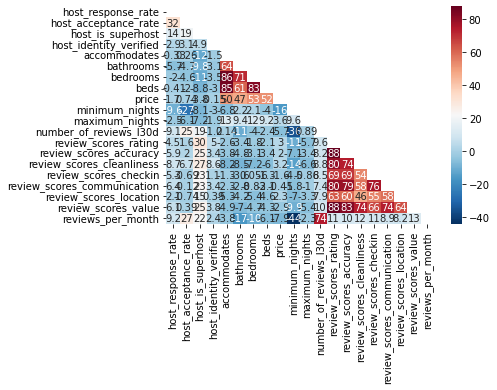

In [9]:
# correlation heatmap
mask = np.zeros_like(airbnb.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(airbnb.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

The median list price is $99.00.


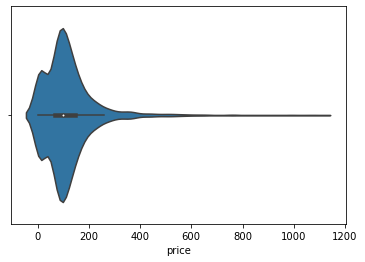

In [11]:
# view distribution of the target variable (price)
sb.violinplot(data=airbnb, x='price')
print(f"The median list price is ${(airbnb.price.median()):,.2f}.")

In [12]:
airbnb.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2101.000000,2101.000000,2101.00000,2101.00000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000
mean,98.662066,92.347454,0.68634,0.84436,4.013803,1.257258,1.646835,2.112327,117.724417,7.279867,531.967634,1.907663,4.852432,4.886069,4.859710,4.921266,4.915988,4.881447,4.795940,2.738696
std,8.211434,16.164959,0.46409,0.36260,2.033599,0.539489,0.962623,1.304478,106.734043,11.577759,517.294375,2.232881,0.285615,0.276352,0.282657,0.274738,0.271439,0.234751,0.306419,2.267940
min,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,100.000000,93.000000,0.00000,1.00000,2.000000,1.000000,1.000000,1.000000,68.000000,1.000000,30.000000,0.000000,4.830000,4.880000,4.840000,4.940000,4.920000,4.860000,4.750000,0.920000
50%,100.000000,98.000000,1.00000,1.00000,4.000000,1.000000,1.000000,2.000000,99.000000,2.000000,360.000000,1.000000,4.920000,4.950000,4.930000,4.980000,4.980000,4.930000,4.860000,2.240000
75%,100.000000,100.000000,1.00000,1.00000,5.000000,1.000000,2.000000,2.000000,145.000000,4.000000,1125.000000,3.000000,4.980000,5.000000,4.990000,5.000000,5.000000,4.990000,4.930000,3.930000
max,100.000000,100.000000,1.00000,1.00000,16.000000,5.000000,9.000000,16.000000,1096.000000,120.000000,1125.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.690000


In [13]:
airbnb.dtypes

host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_identity_verified           int64
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews_l30d           int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [14]:
# we know there is no missing/null or duplicate data because it was completed in the ETL file

In [15]:
# assign dummy values to object columns
# by hot encode categorical data
airbnb_dum = pd.get_dummies(airbnb, columns = ['host_response_time', 'neighbourhood_cleansed', 'room_type'])
airbnb_dum.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
0,100.0,100.0,1,0,3,1.0,2.0,2.0,89.0,3,...,0,0,0,0,0,0,0,0,0,1
1,100.0,55.0,1,1,3,1.0,1.0,1.0,14.0,30,...,0,0,0,0,0,0,0,0,0,1
2,100.0,100.0,1,1,2,1.0,1.0,1.0,129.0,3,...,0,0,0,0,0,0,0,0,0,1
3,100.0,73.0,1,1,2,1.0,1.0,1.0,104.0,30,...,0,0,0,0,0,0,0,0,0,1
4,100.0,0.0,0,1,12,2.0,4.0,5.0,425.0,4,...,0,0,0,0,0,0,0,0,0,1


In [16]:
airbnb_dum.dtypes

host_response_rate                           float64
host_acceptance_rate                         float64
host_is_superhost                              int64
host_identity_verified                         int64
accommodates                                   int64
                                              ...   
neighbourhood_cleansed_West Portland Park      uint8
neighbourhood_cleansed_Wilkes                  uint8
neighbourhood_cleansed_Woodlawn                uint8
neighbourhood_cleansed_Woodstock               uint8
room_type_Entire home/apt                      uint8
Length: 117, dtype: object

## Scale & Normalize the Data

#### Resources
* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://medium.com/p/b79592732b79
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## Machine Learning

#### StandardScaler

In [17]:
# set features list for assigning df after scaler
airbnb_scaled_std = airbnb_dum.copy()
airbnb_scaled_std = airbnb_scaled_std.drop('price', axis=1)
col_names_std = airbnb_scaled_std.columns
features_std = airbnb_scaled_std[col_names_std]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

In [19]:
# set variables
y_std = airbnb_dum.price
X_std = airbnb_scaled_std

In [20]:
# fit and transform the X data; leave y data so we can interpret predicted price
airbnb_scaled_std[col_names_std] = scaler_std.fit_transform(features_std.values)
airbnb_scaled_std

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
0,0.162974,0.473516,0.676021,-2.329179,-0.498645,-0.476969,0.366965,-0.086130,-0.369751,0.382914,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
1,0.162974,-2.310946,0.676021,0.429336,-0.498645,-0.476969,-0.672110,-0.852902,1.962862,0.382914,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2,0.162974,0.473516,0.676021,0.429336,-0.990501,-0.476969,-0.672110,-0.852902,-0.369751,-0.972536,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
3,0.162974,-1.197161,0.676021,0.429336,-0.990501,-0.476969,-0.672110,-0.852902,1.962862,-0.448532,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
4,0.162974,-5.714177,-1.479244,0.429336,3.928060,1.377078,2.445116,2.214189,-0.283358,-0.322848,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,0.162974,0.473516,-1.479244,0.429336,-0.498645,-0.476969,-0.672110,-0.086130,-0.542537,-0.322848,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2097,0.162974,-0.392761,-1.479244,0.429336,-0.006789,-0.476969,-0.672110,-0.852902,-0.542537,-0.322848,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2098,0.162974,0.473516,-1.479244,0.429336,-0.990501,-0.476969,-0.672110,-0.852902,-0.369751,-0.972536,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2099,0.162974,0.473516,-1.479244,0.429336,1.468779,2.304101,1.406041,0.680643,-0.456144,1.146685,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0


In [21]:
# check mean (~0) and standard deviation (~1) of the scaled data
airbnb_scaled_std.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
count,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,...,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2101.0
mean,-5.681636e-16,7.981875e-16,5.541921e-15,1.276677e-16,-4.183606e-17,-2.215162e-16,2.877015e-16,2.095209e-16,-5.350842e-16,8.864346e-17,...,3.511490e-16,4.636938e-17,-1.727689e-16,3.472287e-16,-5.131281e-16,-1.038357e-16,-1.626231e-16,7.093987e-16,3.638081e-16,0.0
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,...,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,0.0
min,-1.201807e+01,-5.714177e+00,-1.479244e+00,-2.329179e+00,-1.482358e+00,-4.769692e-01,-6.721101e-01,-8.529024e-01,-5.425369e-01,-1.022809e+00,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
25%,1.629743e-01,4.037757e-02,-1.479244e+00,4.293358e-01,-9.905014e-01,-4.769692e-01,-6.721101e-01,-8.529024e-01,-5.425369e-01,-9.706024e-01,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
50%,1.629743e-01,3.497622e-01,6.760208e-01,4.293358e-01,-6.789067e-03,-4.769692e-01,-6.721101e-01,-8.612964e-02,-4.561439e-01,-3.325158e-01,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
75%,1.629743e-01,4.735161e-01,6.760208e-01,4.293358e-01,4.850671e-01,-4.769692e-01,3.669652e-01,-8.612964e-02,-2.833577e-01,1.146685e+00,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
max,1.629743e-01,4.735161e-01,6.760208e-01,4.293358e-01,5.895485e+00,6.939218e+00,7.640492e+00,1.064869e+01,9.738238e+00,1.146685e+00,...,4.582576e+01,5.347107e+00,2.289651e+01,1.107196e+01,6.277248e+00,1.378405e+01,2.289651e+01,8.764406e+00,8.308630e+00,0.0


In [22]:
airbnb_scaled_std.shape

(2101, 116)

In [23]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.2, random_state=573)
print(X_std_train.shape)

(1680, 116)


In [24]:
from sklearn.linear_model import LinearRegression
model_std = LinearRegression()

In [25]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_std.fit(X_std, y_std)
training_score_std = model_std.score(X_std_train, y_std_train)
testing_score_std = model_std.score(X_std_test, y_std_test)

print(f"Training Score: {training_score_std}")
print(f"Testing Score: {testing_score_std}")

Training Score: 0.42398278875247797
Testing Score: 0.41345965103083504


In [26]:
y_pred_std = model_std.predict(X_std_test)

In [27]:
# compare actual vs predicted
regr_df_std = pd.DataFrame({'Actual':y_std_test, 'Predicted':y_pred_std, 'ABS Difference': abs(y_std_test-y_pred_std)})

In [28]:
regr_df_std.describe()

,Actual,Predicted,ABS Difference
count,421.000000,421.000000,421.000000
mean,120.529691,121.892275,61.356963
std,125.310100,76.749518,73.733170
min,1.000000,-64.376879,0.064379
25%,63.000000,73.470777,16.775464
50%,97.000000,102.986402,41.029223
75%,147.000000,152.502027,83.064527
max,988.000000,535.959058,770.216723


#### MinMaxScaler

In [29]:
# set features list for assigning df after scaler
airbnb_scaled_mm = airbnb_dum.copy()
airbnb_scaled_mm = airbnb_scaled_mm.drop('price', axis=1)
col_names_mm = airbnb_scaled_mm.columns
features_mm = airbnb_scaled_mm[col_names_mm]

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()

In [31]:
# set variables
y_mm = airbnb_dum.price
X_mm = airbnb_scaled_mm

In [32]:
# fit and transform the data
airbnb_scaled_mm[col_names_mm] = scaler_mm.fit_transform(features_mm.values)
airbnb_scaled_mm

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
0,1.0,1.00,1.0,0.0,0.133333,0.000,0.125,0.066667,0.016807,0.647950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.55,1.0,1.0,0.133333,0.000,0.000,0.000000,0.243697,0.647950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.00,1.0,1.0,0.066667,0.000,0.000,0.000000,0.016807,0.023173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.73,1.0,1.0,0.066667,0.000,0.000,0.000000,0.243697,0.264706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.00,0.0,1.0,0.733333,0.250,0.375,0.266667,0.025210,0.322638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1.0,1.00,0.0,1.0,0.133333,0.000,0.000,0.066667,0.000000,0.322638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2097,1.0,0.86,0.0,1.0,0.200000,0.000,0.000,0.000000,0.000000,0.322638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,1.0,1.00,0.0,1.0,0.066667,0.000,0.000,0.000000,0.016807,0.023173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099,1.0,1.00,0.0,1.0,0.400000,0.375,0.250,0.133333,0.008403,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
airbnb_scaled_mm.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
count,2101.000000,2101.000000,2101.00000,2101.00000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,...,2101.000000,2101.000000,2101.000000,2101.000000,2101.00000,2101.000000,2101.000000,2101.000000,2101.000000,2101.0
mean,0.986621,0.923475,0.68634,0.84436,0.200920,0.064315,0.080854,0.074155,0.052772,0.471451,...,0.000476,0.033793,0.001904,0.008091,0.02475,0.005236,0.001904,0.012851,0.014279,0.0
std,0.082114,0.161650,0.46409,0.36260,0.135573,0.134872,0.120328,0.086965,0.097292,0.461047,...,0.021817,0.180740,0.043602,0.089609,0.15540,0.072185,0.043602,0.112658,0.118666,0.0
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.930000,0.00000,1.00000,0.066667,0.000000,0.000000,0.000000,0.000000,0.024064,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.980000,1.00000,1.00000,0.200000,0.000000,0.000000,0.066667,0.008403,0.318182,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.00000,1.00000,0.266667,0.000000,0.125000,0.066667,0.025210,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0


In [34]:
airbnb_scaled_mm.shape

(2101, 116)

In [35]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y_mm, test_size=0.2, random_state=573)
print(X_mm_train.shape)

(1680, 116)


In [36]:
from sklearn.linear_model import LinearRegression
model_mm = LinearRegression()

In [37]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_mm.fit(X_mm, y_mm)
training_score_mm = model_mm.score(X_mm_train, y_mm_train)
testing_score_mm = model_mm.score(X_mm_test, y_mm_test)

print(f"Training Score: {training_score_mm}")
print(f"Testing Score: {testing_score_mm}")

Training Score: 0.42517224572210555
Testing Score: 0.41233912172541476


In [38]:
y_pred_mm = model_mm.predict(X_mm_test)

In [39]:
# compare actual vs predicted
regr_df_mm = pd.DataFrame({'Actual':y_mm_test, 'Predicted':y_pred_mm, 'ABS Difference': abs(y_mm_test-y_pred_mm)})
regr_df_mm

,Actual,Predicted,ABS Difference
1886,85.0,68.554688,16.445312
1906,436.0,219.492188,216.507812
1370,63.0,56.132812,6.867188
568,14.0,117.117188,103.117188
1124,15.0,134.671875,119.671875
...,...,...,...
744,103.0,86.179688,16.820312
629,101.0,100.335938,0.664062
1782,1.0,69.773438,68.773438
402,176.0,175.726562,0.273438


In [40]:
regr_df_mm.describe()

,Actual,Predicted,ABS Difference
count,421.000000,421.000000,421.000000
mean,120.529691,121.821444,61.294797
std,125.310100,76.740351,73.904118
min,1.000000,-65.656250,0.039062
25%,63.000000,73.835938,17.226562
50%,97.000000,103.632812,40.968750
75%,147.000000,151.882812,82.437500
max,988.000000,538.085938,774.335938


### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

#### StandardScaler

In [41]:
from sklearn import metrics

MAE_std = metrics.mean_absolute_error(y_std_test, y_pred_std)
MSE_std = metrics.mean_squared_error(y_std_test,y_pred_std)
RMSE_std = np.sqrt(MSE_std)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_std}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_std}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_std}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 61.356963312979246.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 9188.34387404586.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 95.85584945138122.


In [42]:
R2_std = model_std.score(X_std,y_std)
print(f'R2 score is {R2_std}')

R2 score is 0.42118159124380616


In [43]:
# calculate adjusted R2 since we have a multivariate regression
aR2_std = 1-(((1-R2_std)*(len(y_std)-1))/(len(y_std)-X_std.shape[1]-1))
print(f'Adjusted R2 score is {aR2_std}')
print(f'There are {len(y_std)} in the observation and {X_std.shape[1]} predictor variables.')

Adjusted R2 score is 0.38733938589314165
There are 2101 in the observation and 116 predictor variables.


#### MinMaxScaler

In [44]:
from sklearn import metrics

MAE_mm = metrics.mean_absolute_error(y_mm_test, y_pred_mm)
MSE_mm = metrics.mean_squared_error(y_mm_test,y_pred_mm)
RMSE_mm = np.sqrt(MSE_mm)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_mm}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_mm}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_mm}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 61.2947966152019.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 9205.897327269058.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 95.94736748483024.


In [45]:
R2_mm = model_mm.score(X_mm,y_mm)
print(f'R2 score is {R2_mm}')

R2 score is 0.4217340384386288


In [46]:
# calculate adjusted R2 since we have a multivariate regression
aR2_mm = 1-(((1-R2_mm)*(len(y_mm)-1))/(len(y_mm)-X_mm.shape[1]-1))
print(f'Adjusted R2 score is {aR2_mm}')
print(f'There are {len(y_mm)} in the observation and {X_mm.shape[1]} predictor variables.')

Adjusted R2 score is 0.38792413342798404
There are 2101 in the observation and 116 predictor variables.


### Results

The results between the StandardScaler and the the MinMaxScaler are nearly identical. An RMSE of about (USD)95 is not necessarily a poor fit RMSE, however, the adjusted r-squared is indicative that the predicted model is not a good fit for the dataset. It would not be recommended to use this model to predict list price.